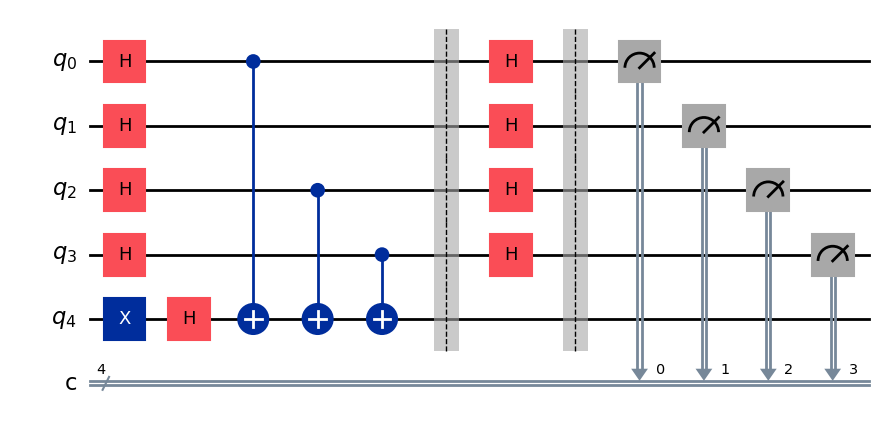

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bernstein_vazirani(n, s):
    """ Bernstein-Vazirani """
    qc = QuantumCircuit(n + 1, n) 
    qc.x(n)
    qc.h(range(n + 1))
    for i, bit in enumerate(reversed(s)):  
        if bit == "1":
            qc.cx(i, n)
    qc.barrier()
    qc.h(range(n))
    qc.barrier()
    qc.measure(range(n), range(n))
    return qc

# Parámetros
n = 4 
s = "1101" 
qc = bernstein_vazirani(n, s)
qc.draw("mpl")

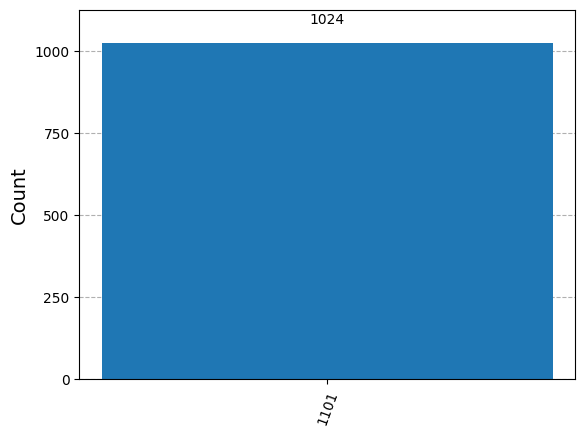

In [8]:
backend = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)
#plt.show()